## Строим чат-бота для иллюстрации новостей в Yandex DataSphere

Для примера возьмём новость с сайта популярной китайской газеты [Гуанмин Жибао](http://gmw.cn/)

In [1]:
text = """
　作者：浙江大学长三角一体化发展研究中心课题组

　　长三角地区包括上海、江苏、浙江、安徽三省一市，以不足4%的国土面积，集聚了全国约17%的人口，创造出全国近四分之一的经济总量，在全国经济板块中具有举足轻重的地位。2018年11月，习近平总书记在上海宣布，支持长江三角洲区域一体化发展并上升为国家战略。2019年5月，习近平总书记主持召开中共中央政治局会议，审议通过《长江三角洲区域一体化发展规划纲要》，为长三角一体化发展举旗定向、擘画蓝图。长三角一体化发展的第一个五年间，三省一市紧扣一体化和高质量两个关键词，不断推动“蓝图规划”变为“现实画卷”，长三角成为我国经济最活跃、开放程度最高、创新能力最强的区域之一。

今年4月30日，中共中央政治局召开会议，审议《关于持续深入推进长三角一体化高质量发展若干政策措施的意见》，提出要加快突破关键核心技术，统筹推进传统产业升级、新兴产业壮大、未来产业培育，在更大范围内联动构建创新链、产业链、供应链。当前，新一轮科技革命和产业变革与我国加快培育发展新质生产力形成了历史性交汇，长三角一体化发展已迈入“第二个五年”，如何在高质量发展基础上向“新”提质、积“势”成力，成为我国培育、发展和释放新质生产力的高地和窗口，是长三角三省一市必须回答的新课题。
"""

In [2]:
import requests
import os

def call_api(url, data):
    headers = { "Authorization" : f"Api-Key {os.environ['api_key']}" }
    return requests.post(url, json=data, headers=headers).json()
    
call_api("https://translate.api.cloud.yandex.net/translate/v2/translate",
{
  "targetLanguageCode" : "ru",
  "texts" : [text]
})
    

{'translations': [{'text': '\n\u3000Автор: Исследовательская группа, Исследовательский центр интеграции и развития дельты реки Янцзы, Чжэцзянский университет\n\n\u3000\u3000Регион дельты реки Янцзы включает в себя три провинции и один город - Шанхай, Цзянсу, Чжэцзян и Аньхой. На его территории, занимающей менее 4% территории страны, проживает около 17% населения и создается почти четверть всей экономики страны. Он занимает важное положение в народнохозяйственном секторе.В ноябре 2018 года Генеральный секретарь Си Цзиньпин объявил в Шанхае, что он поддерживает развитие региональной интеграции в дельте реки Янцзы и продвигает ее в качестве национальной стратегии.В мае 2019 года Генеральный секретарь Си Цзиньпин председательствовал на заседании Политбюро Центрального комитета Коммунистической партии Китая, на котором был рассмотрен и принят "План регионального интеграционного развития дельты реки Янцзы", чтобы поднять флаг и составить план комплексного развития дельты реки Янцзы.В течение

In [3]:
def translate(text, target_language="ru"):
    res = call_api("https://translate.api.cloud.yandex.net/translate/v2/translate",
    {
      "targetLanguageCode" : target_language,
      "texts" : [text]})
    return res['translations'][0]['text']
    
text_ru = translate(text)
text_ru

'\n\u3000Автор: Исследовательская группа, Исследовательский центр интеграции и развития дельты реки Янцзы, Чжэцзянский университет\n\n\u3000\u3000Регион дельты реки Янцзы включает в себя три провинции и один город - Шанхай, Цзянсу, Чжэцзян и Аньхой. На его территории, занимающей менее 4% территории страны, проживает около 17% населения и создается почти четверть всей экономики страны. Он занимает важное положение в народнохозяйственном секторе.В ноябре 2018 года Генеральный секретарь Си Цзиньпин объявил в Шанхае, что он поддерживает развитие региональной интеграции в дельте реки Янцзы и продвигает ее в качестве национальной стратегии.В мае 2019 года Генеральный секретарь Си Цзиньпин председательствовал на заседании Политбюро Центрального комитета Коммунистической партии Китая, на котором был рассмотрен и принят "План регионального интеграционного развития дельты реки Янцзы", чтобы поднять флаг и составить план комплексного развития дельты реки Янцзы.В течение первых пяти лет комплексно

In [4]:
%pip install yandex_chain

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [14]:
from yandex_chain import YandexLLM, YandexGPTModel

folder_id = "b1gst3c7cskk2big5fqn"

gpt = YandexLLM(folder_id=folder_id, api_key=os.environ['api_key'], model=YandexGPTModel.Pro)
gpt.instruction_text="""
Ты - профессиональный редактор новостей. Твоя задача - понять, какая картинка подойдёт
к конкретной новости, и написать её краткой описание в виде промпта для генеративной нейросети YandexART.
Прочитай текст новости ниже и напиши промпт с описанием релевантной картинки. В промпте должны быть
чёткие описание конкретных объектов, которые необходимо нарисовать. В качестве ответа выведи только
текст промпта для Yandex ART, не пиши никакого дополнительного текста. Промпт должен быть короткий, не более
5 строчек текста.
"""
res = gpt.invoke(text)
res

'Изобразить встречу представителей **Центра исследования комплексного развития региона «Чан-Сан»** (长三角一体化发展研究中心), на которой они обсуждают план развития региона и его значение для экономики Китая.\n\n*На картинке должны быть изображены:*\n1. Стол с картой региона «Чан-Сан», расположенный в конференц-зале. \n2. Люди, сидящие за столом — представители центра исследования комплексного развития «Чан-Сан». \n3. На стене висит большой плакат с изображением логотипа центра.'

In [31]:
def submit_art(prompt):
    res = call_api("https://llm.api.cloud.yandex.net/foundationModels/v1/imageGenerationAsync",
    {
        "modelUri": f"art://{folder_id}/yandex-art/latest",
        "messages": [
          {
            "weight": 1,
            "text": prompt
          }
        ]
    })
    if 'error' in res:
        return None
    return res['id']

id = submit_art(res)
id

TypeError: Object of type JpegImageFile is not JSON serializable

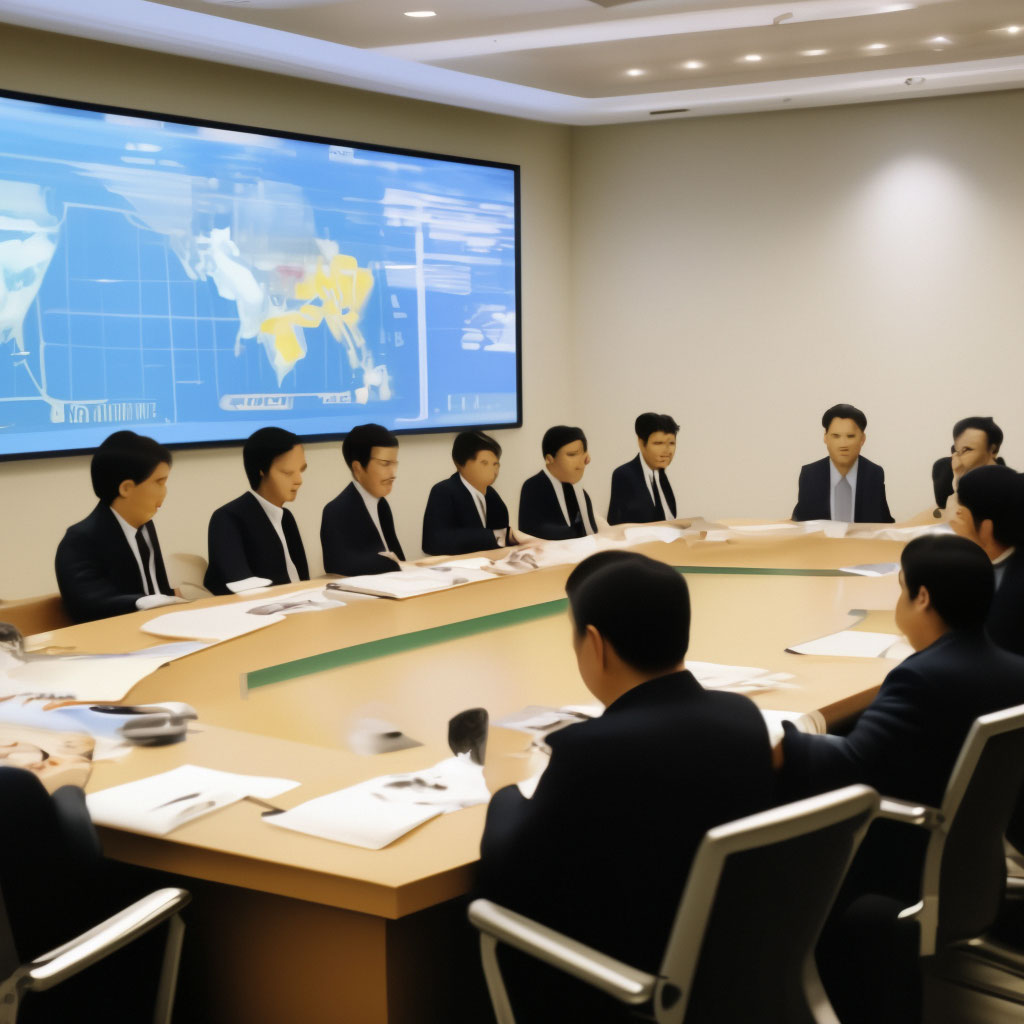

In [22]:
import io
from PIL import Image
import base64

def call_api_get(url, data):
    headers = { "Authorization" : f"Api-Key {os.environ['api_key']}" }
    return requests.get(url, headers=headers).json()

def decode_image(base64_str):
    return Image.open(io.BytesIO(base64.decodebytes(bytes(base64_str, "utf-8"))))

def check(id):
    res = call_api_get(f"https://llm.api.cloud.yandex.net:443/operations/{id}",{})
    if res['done']:
        return decode_image(res['response']['image'])
    else:
        return None
    
res = check(id)
res

In [23]:
%pip install telebot

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 555.0 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 1.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [32]:
import telebot, time
from io import BytesIO

bot = telebot.TeleBot(os.environ['tg_token'])

@bot.message_handler(content_types=['text'])
def get_text_messages(message):
    if message=='/start':
        bot.send_message(message.from_user.id, f"Yo!")
        return
    print('Translating')
    text_ru = translate(message.text)
    print('Extracting prompt')
    res = gpt.invoke(text_ru)
    bot.send_message(message.from_user.id, f"Я побежал рисовать по запросу {res}")
    print('Sumbitting to ART')
    id = submit_art(res)
    if not id:
        bot.send_message(message.from_user.id, f"Что-то пошло не так")
        return
    while True:
        time.sleep(5)
        print('Checking')
        res = check(id)
        if res:
            break
    bio = BytesIO()
    bio.name = 'image.jpeg'
    res.save(bio, 'JPEG')
    bio.seek(0)
    bot.send_photo(message.from_user.id, photo=bio)
    
bot.polling(non_stop=True, interval=2)
        

Translating
Extracting prompt
Sumbitting to ART
Translating
Extracting prompt
Sumbitting to ART
Checking
Checking
Checking
Checking
